# Telco Customer Churn

## Data Collection & Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

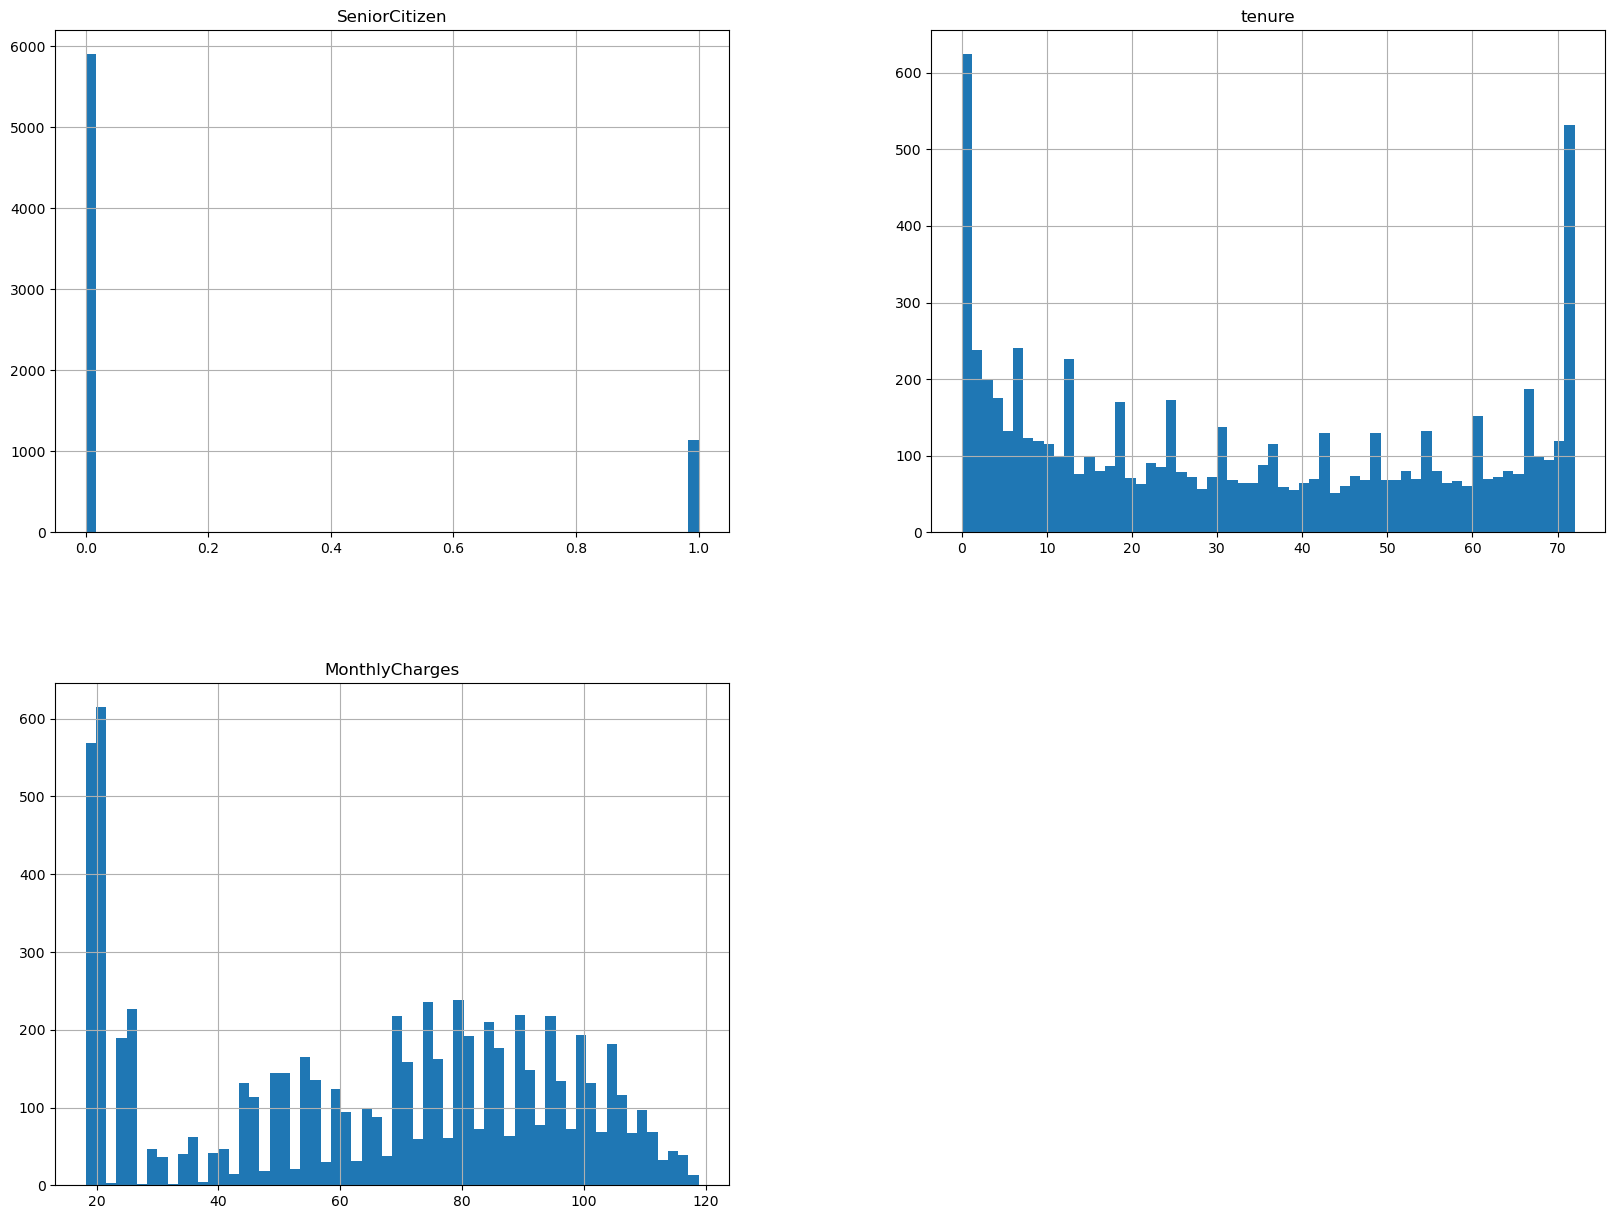

In [5]:
churn.hist(bins=60, figsize=(20,15))

In [9]:
numerical_cols = churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_df = churn[numerical_cols]
numerical_df

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


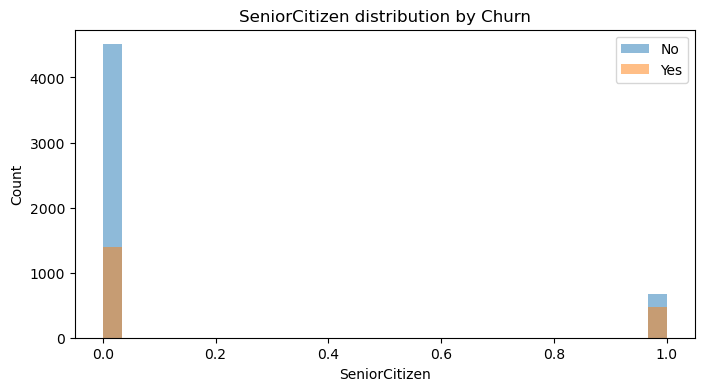

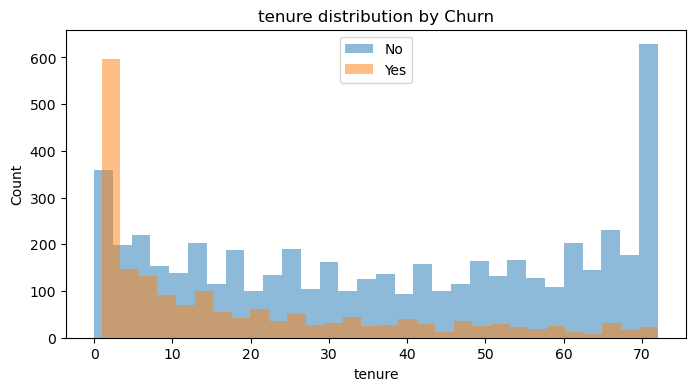

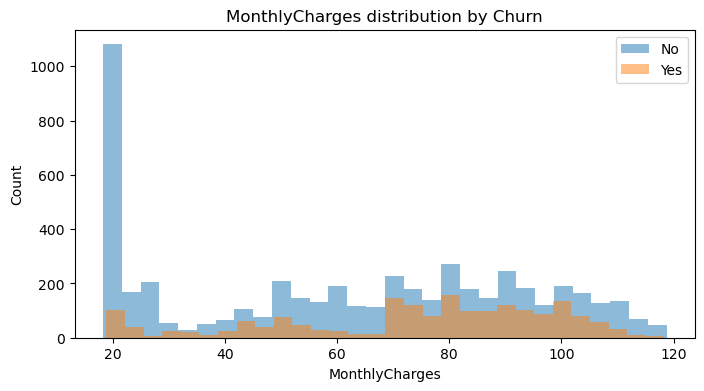

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    for label in churn['Churn'].unique():
        subset = churn[churn['Churn'] == label]
        plt.hist(subset[col], bins=30, alpha=0.5, label=label)
    plt.title(f'{col} distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [11]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [12]:
unique_counts = categorical_df.nunique()
print(unique_counts)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Find categorical columns with exactly 2 unique values (excluding customerID)
binary_cols = [col for col in categorical_cols if unique_counts[col] == 2 and col != 'customerID']

le = LabelEncoder()
for col in binary_cols:
    churn[col] = le.fit_transform(churn[col])

churn[binary_cols].head()
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int32  


In [15]:
cols_to_check = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

for col in cols_to_check:
    if col in churn.columns:
        print(f"{col}: {churn[col].unique()}")

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
# One-hot encode 'Contract' and 'PaymentMethod' with 1/0 values (not True/False)
contract_dummies = pd.get_dummies(churn['Contract'], prefix='Contract', dtype=int)
payment_dummies = pd.get_dummies(churn['PaymentMethod'], prefix='PaymentMethod', dtype=int)

# Concatenate the new columns to the original dataframe
churn = pd.concat([churn, contract_dummies, payment_dummies], axis=1)

# Show the new columns
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,29.85,29.85,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,56.95,1889.5,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,53.85,108.15,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,70.70,151.65,1,1,0,0,0,0,1,0


C:\Users\Zainab\AppData\Local\Temp\ipykernel_15320\1926088224.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_df = churn[cols_of_interest].replace({


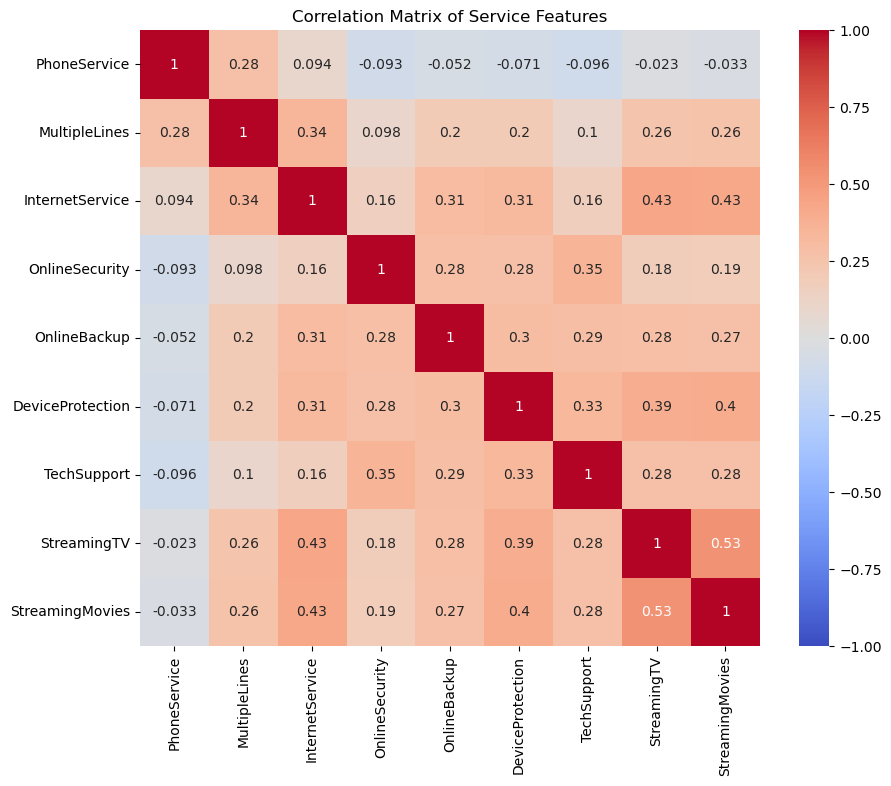

In [17]:
# Select the columns of interest
cols_of_interest = [
    'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a copy to avoid modifying the original dataframe
corr_df = churn[cols_of_interest].replace({
    'No': 0, 'Yes': 1,
    'No phone service': -1, 'No internet service': -1,
    'DSL': 0, 'Fiber optic': 1, 'No': -1
})

# For InternetService, map 'DSL' to 0, 'Fiber optic' to 1, 'No' to -1
corr_df['InternetService'] = churn['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': -1})

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Service Features')
plt.show()

In [18]:
churn["StreamingUser"] = np.where(
    (churn["StreamingTV"] == "Yes") | (churn["StreamingMovies"] == "Yes"), 1, 0
)

In [19]:
churn.drop(["StreamingTV", "StreamingMovies"], axis=1, inplace=True)

In [20]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,1990.5,0,0,1,0,0,0,0,1,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,7362.9,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,346.45,0,1,0,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,306.6,1,1,0,0,0,0,0,1,0


In [21]:
cols_to_check = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

for col in cols_to_check:
    if col in churn.columns:
        print(f"{col}: {churn[col].unique()}")

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(churn['MultipleLines'], churn['Churn'])

# Run Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p_value:.4f}")

P-value: 0.0035


In [23]:
pd.set_option('display.max_columns', None)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,One year,0,Mailed check,56.95,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,0,1,0,0


In [24]:
churn.drop(['Contract', 'PaymentMethod'], axis=1, inplace=True) 

In [25]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,1,29.85,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,0,56.95,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,1,53.85,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,0,42.30,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,1,70.70,151.65,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,1,84.80,1990.5,0,0,1,0,0,0,0,1,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,1,103.20,7362.9,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,1,29.60,346.45,0,1,0,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,1,74.40,306.6,1,1,0,0,0,0,0,1,0


In [26]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TotalCharges
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,29.85
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,1889.5
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,108.15
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,1840.75
4,9237-HQITU,No,Fiber optic,No,No,No,No,151.65


In [27]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN, then fill NaN with 0 and convert to int
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [28]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes
4,9237-HQITU,No,Fiber optic,No,No,No,No


In [29]:
# One-hot encode selected categorical columns with 1/0 values (not True/False)
cols_to_encode = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport'
]

encoded_dfs = [pd.get_dummies(churn[col], prefix=col, dtype=int) for col in cols_to_encode]
churn = pd.concat([churn] + encoded_dfs, axis=1)

# Show the new columns
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,1,29.85,29,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,0,56.95,1889,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,1,53.85,108,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,0,42.30,1840,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,1,70.70,151,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [30]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   MultipleLines                            7043 non-null   object 
 8   InternetService                          7043 non-null   object 
 9   OnlineSecurity                           7043 non-null   object 
 10  OnlineBackup                             7043 no

In [31]:
churn.shape

(7043, 43)

In [32]:
churn.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], axis=1, inplace=True)

In [33]:
churn.shape

(7043, 37)

In [ ]:
churn.drop(['customerID'],axis=1, inplace=True)

In [34]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   int32  
 10  Churn                                    7043 no

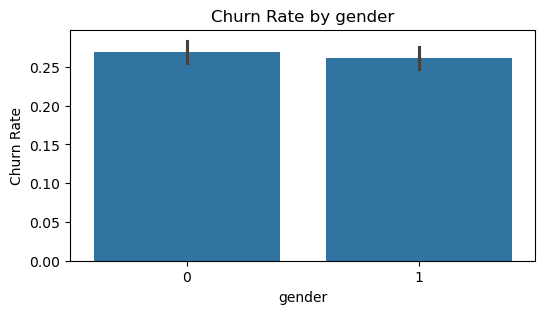

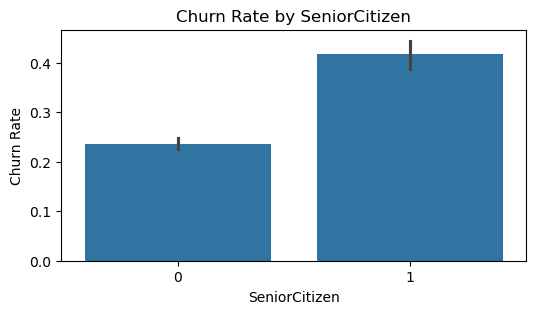

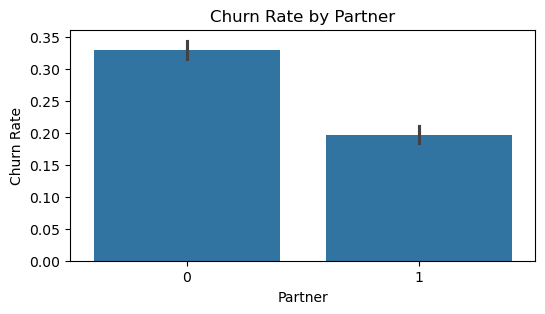

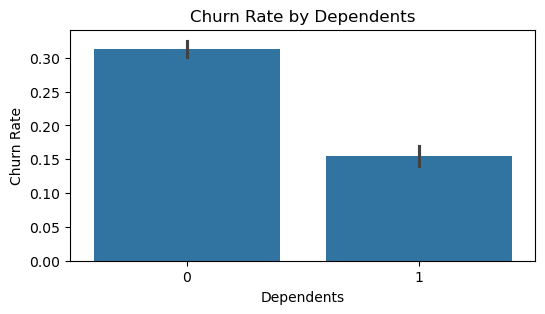

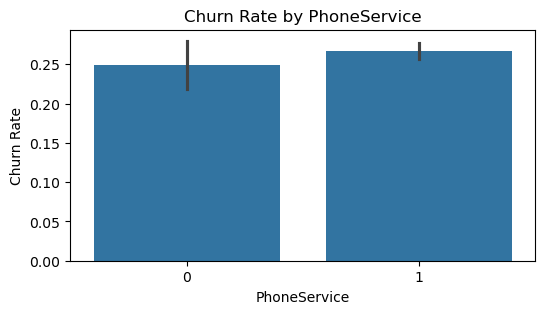

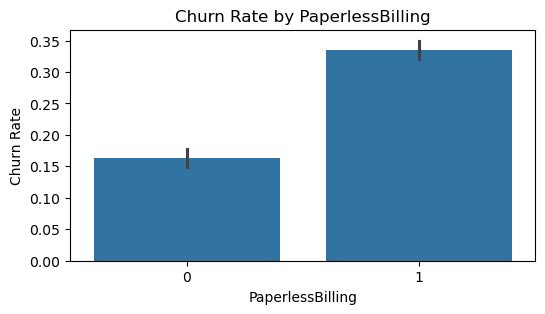

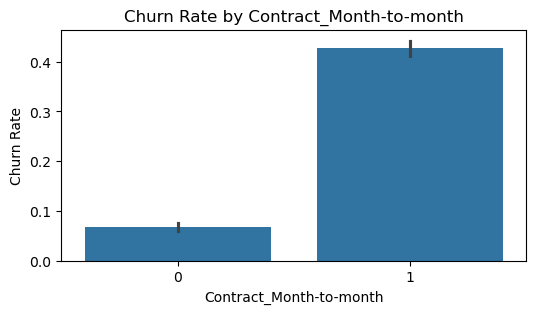

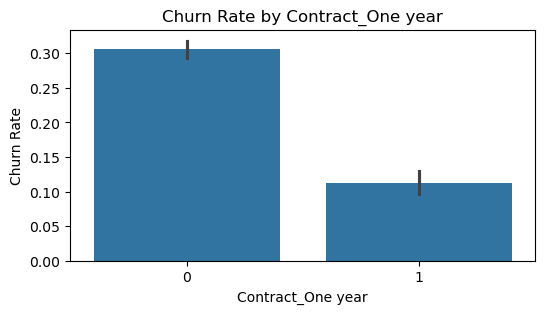

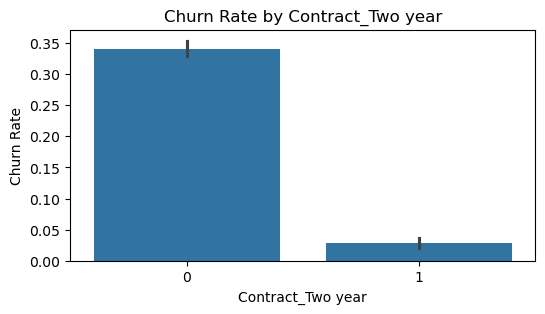

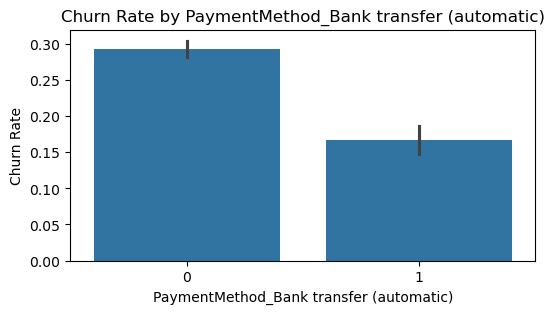

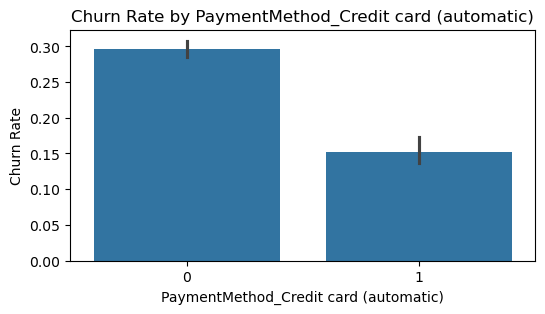

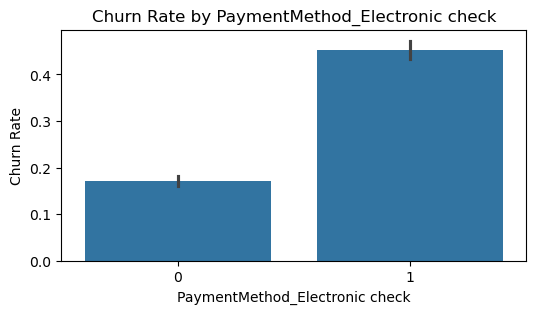

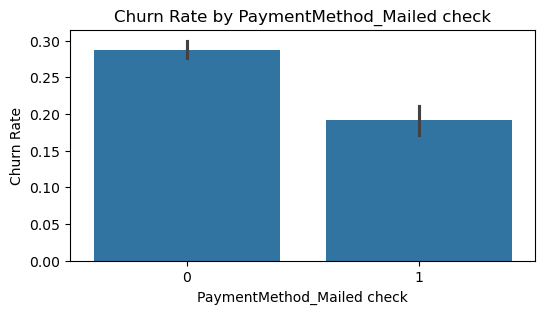

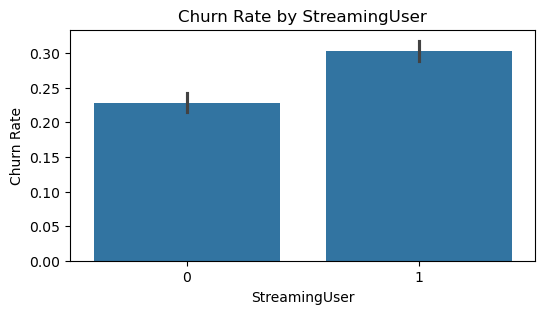

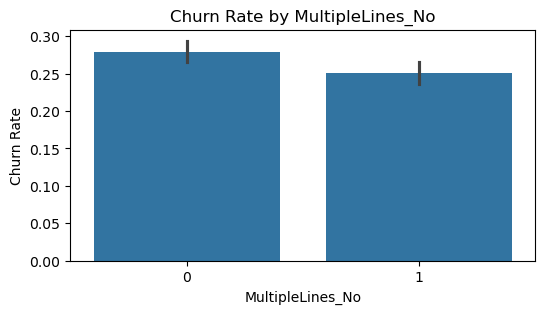

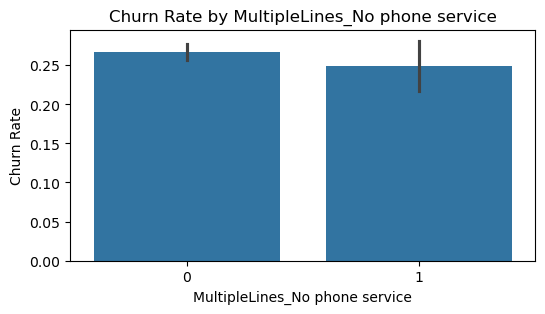

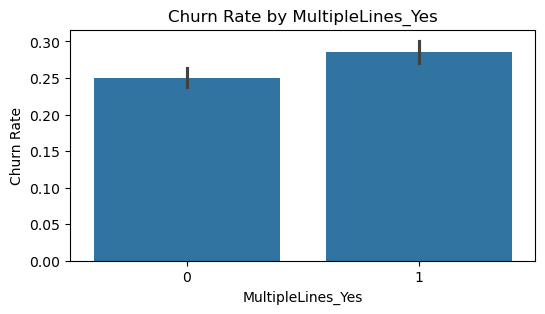

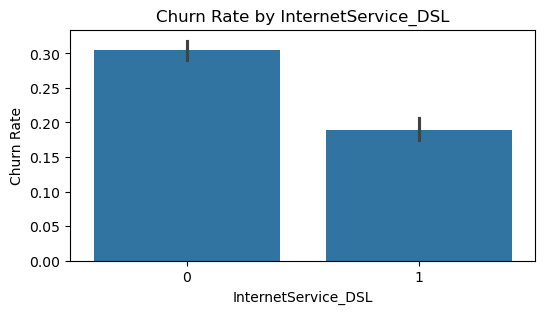

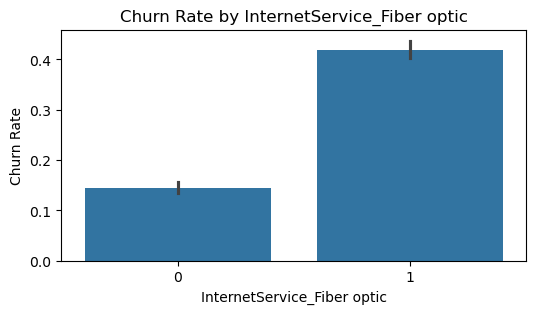

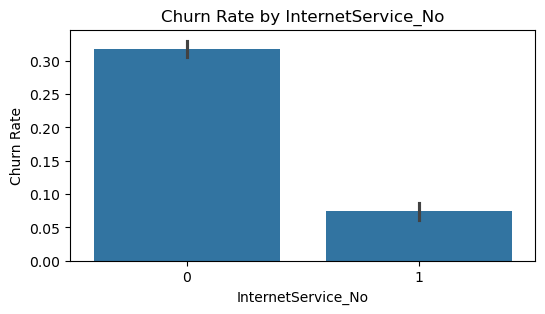

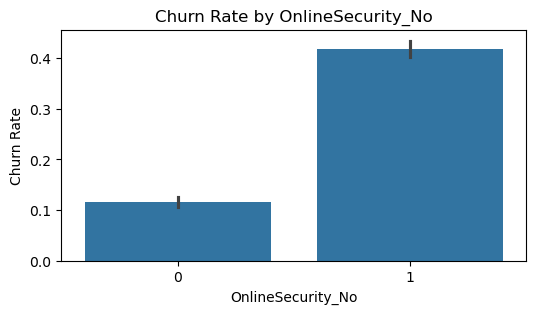

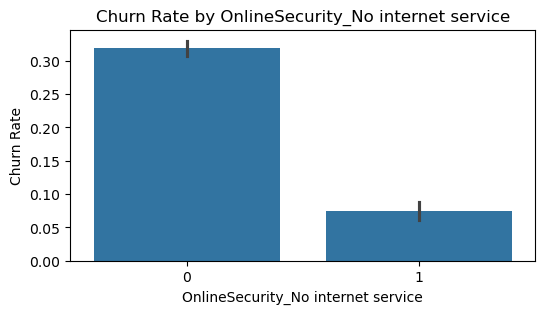

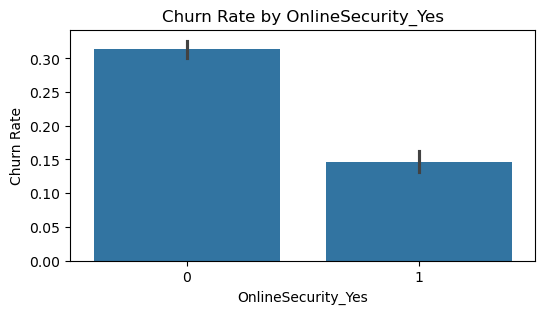

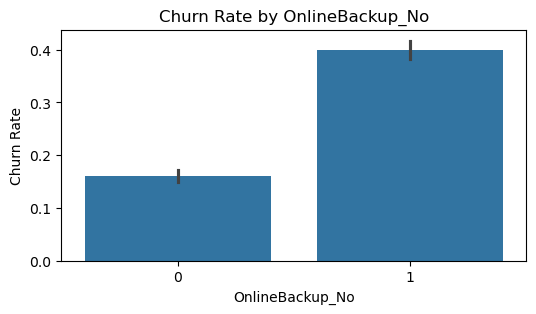

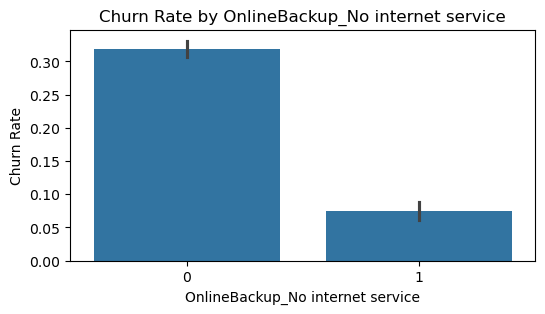

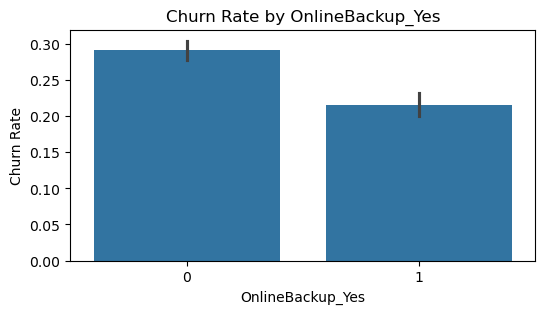

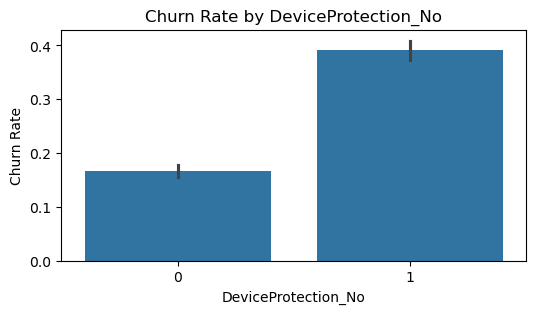

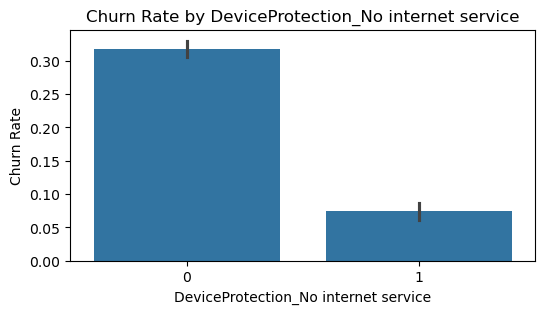

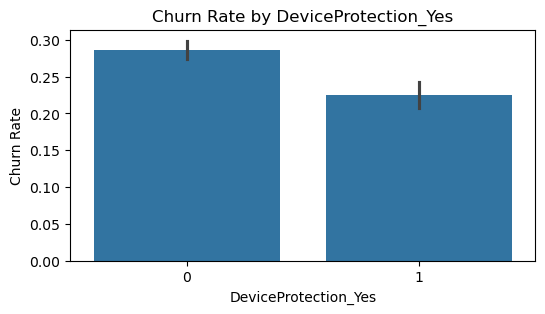

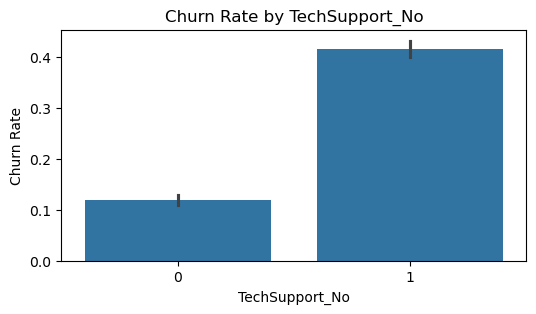

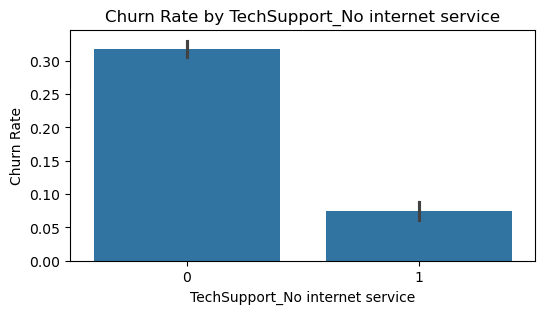

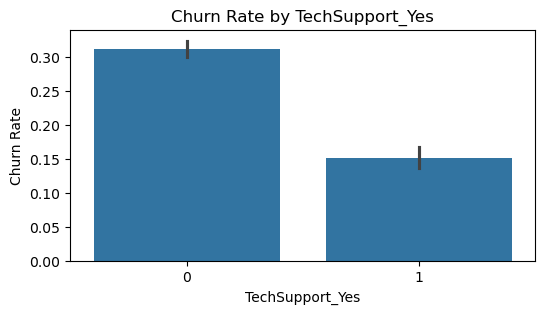

In [35]:
# Separate discrete (categorical/binary) and continuous (numerical) features
discrete_features = [col for col in churn.columns if churn[col].nunique() <= 10 and col != 'Churn']
continuous_features = [col for col in churn.columns if churn[col].nunique() > 10 and col != 'Churn']

# Visualize discrete features vs target
for col in discrete_features:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=col, y='Churn', data=churn)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.show()

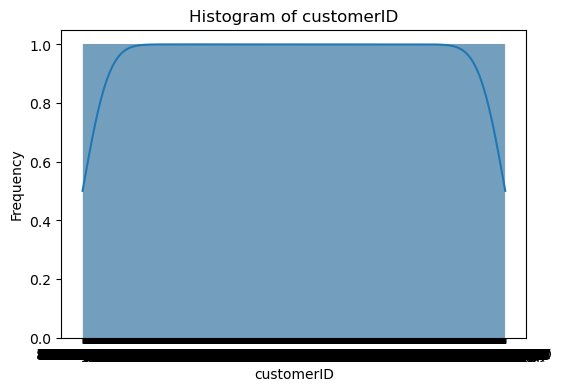

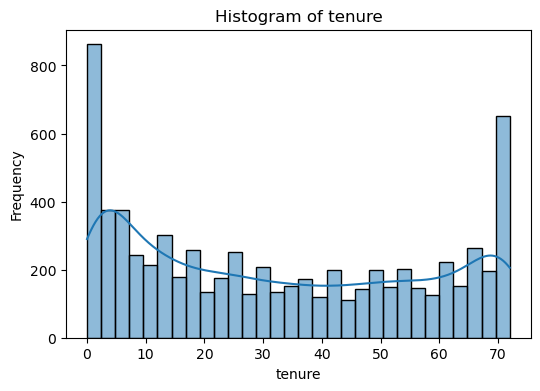

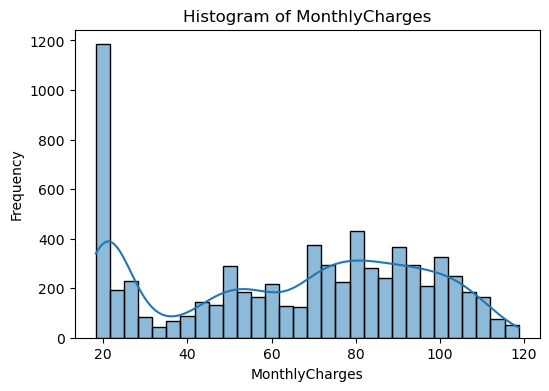

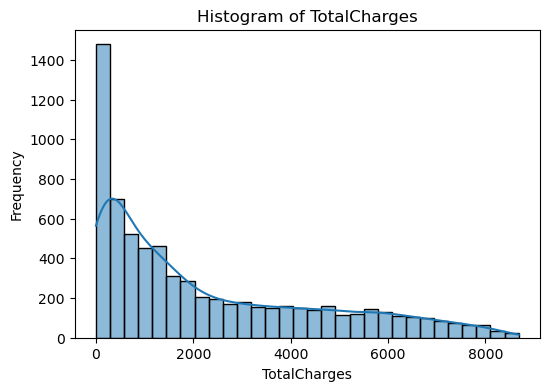

In [36]:
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(churn[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

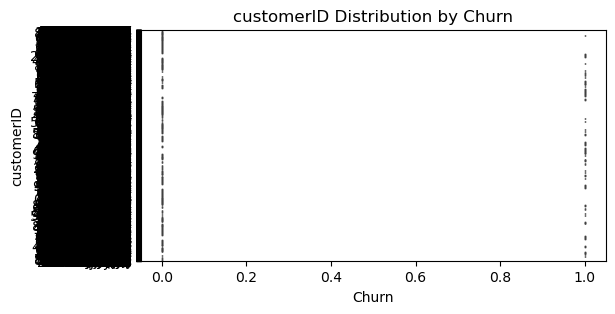

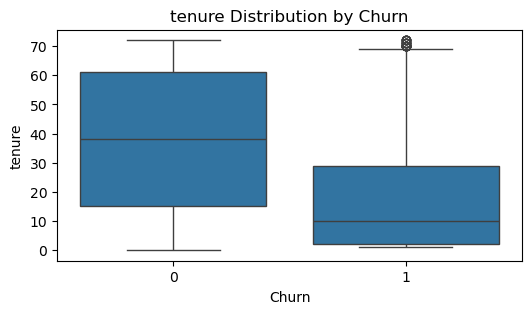

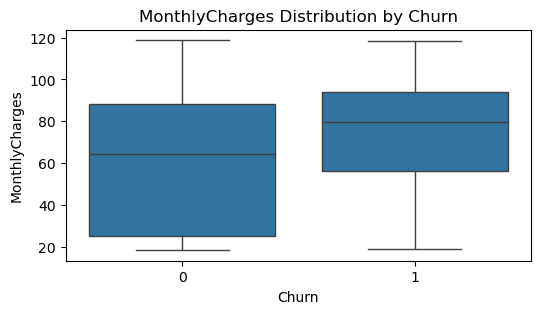

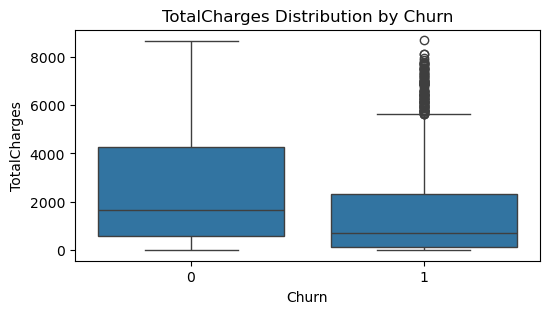

In [37]:
# Visualize continuous features vs target
for col in continuous_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Churn', y=col, data=churn)
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

C:\Users\Zainab\AppData\Local\Temp\ipykernel_15320\571032547.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2.  2.  8. ...  1. 67.  4.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = np.clip(df.loc[mask, col], lower, upper)
C:\Users\Zainab\AppData\Local\Temp\ipykernel_15320\571032547.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 108.   151.   820.  ...   75.  5626.5  306. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = np.clip(df.loc[mask, col], lower, upper)


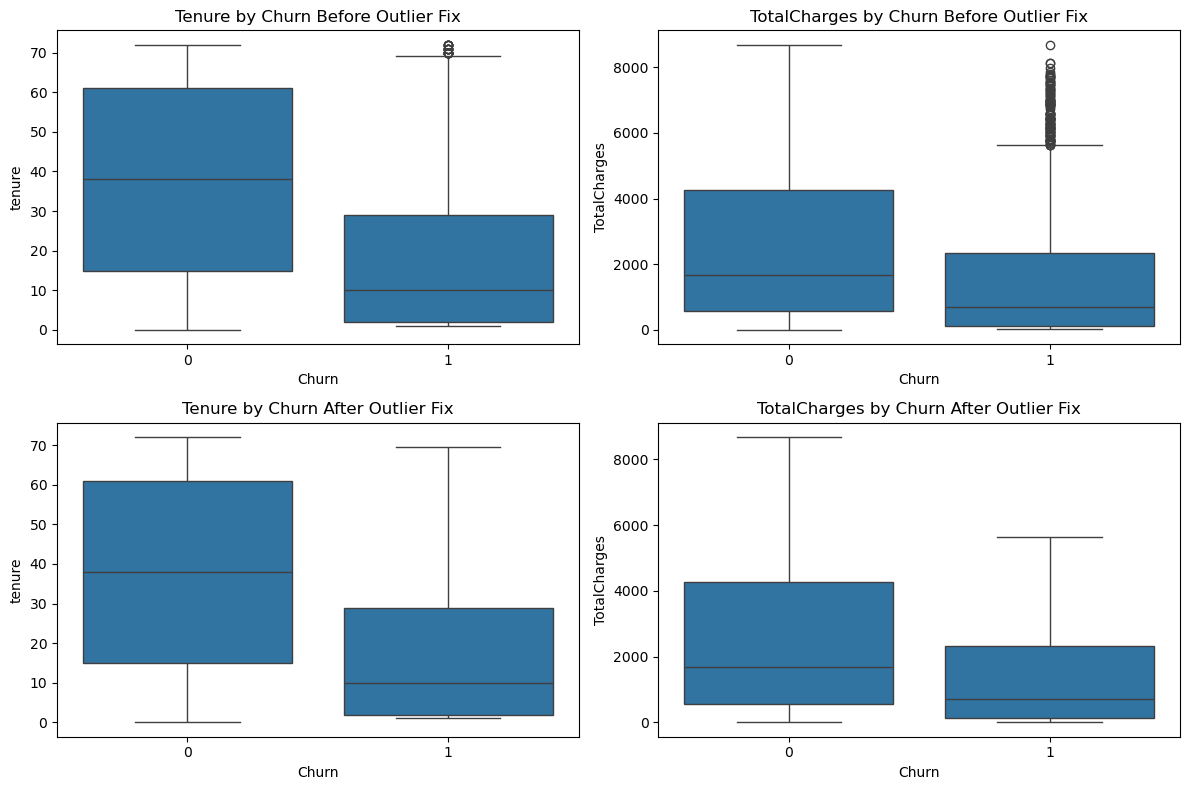

In [38]:
# Visualize before fixing outliers by churn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='Churn', y='tenure', data=churn, ax=axes[0, 0])
axes[0, 0].set_title('Tenure by Churn Before Outlier Fix')
sns.boxplot(x='Churn', y='TotalCharges', data=churn, ax=axes[0, 1])
axes[0, 1].set_title('TotalCharges by Churn Before Outlier Fix')

# Fix outliers using IQR method within each churn group
def fix_outliers_iqr_by_group(df, col, group_col='Churn', k=1.5):
    df = df.copy()
    for group in df[group_col].unique():
        mask = df[group_col] == group
        Q1 = df.loc[mask, col].quantile(0.25)
        Q3 = df.loc[mask, col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df.loc[mask, col] = np.clip(df.loc[mask, col], lower, upper)
    return df

churn = fix_outliers_iqr_by_group(churn, 'tenure')
churn = fix_outliers_iqr_by_group(churn, 'TotalCharges')

# Visualize after fixing outliers by churn
sns.boxplot(x='Churn', y='tenure', data=churn, ax=axes[1, 0])
axes[1, 0].set_title('Tenure by Churn After Outlier Fix')
sns.boxplot(x='Churn', y='TotalCharges', data=churn, ax=axes[1, 1])
axes[1, 1].set_title('TotalCharges by Churn After Outlier Fix')
plt.tight_layout()
plt.show()


In [43]:
x_churn = churn.drop('Churn', axis=1)
X_notstanderized_churn = churn.drop('Churn', axis=1)
y_churn = churn[['Churn']]

In [51]:
# x_churn.drop(['customerID'], axis=1, inplace=True)
x_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,1.0,0,1,29.85,29.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,34.0,1,0,56.95,1889.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2.0,1,1,53.85,108.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45.0,0,0,42.30,1840.0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,0,0,0,0,2.0,1,1,70.70,151.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,84.80,1990.0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
7039,0,0,1,1,72.0,1,1,103.20,7362.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
7040,0,0,1,1,11.0,0,1,29.60,346.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
7041,1,1,1,0,4.0,1,1,74.40,306.0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['TotalCharges', 'MonthlyCharges', 'tenure']
x_churn[cols_to_scale] = scaler.fit_transform(x_churn[cols_to_scale])
x_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,-1.277612,0,1,-1.160323,-0.998630,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0.066516,1,0,-0.259629,-0.167227,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.236881,1,1,-0.362660,-0.963318,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1,0,0,0,0.514558,0,0,-0.746535,-0.189130,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,0,0,0,0,-1.236881,1,1,0.197365,-0.944097,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


## Model Training

### 1)Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_churn, y_churn, test_size=0.2, random_state=100)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

# Accuracy on TRAIN data
train_acc_lr = accuracy_score(y_train, lr_y_train_pred)
train_recall_lr = recall_score(y_train, lr_y_train_pred)
train_precision_lr = precision_score(y_train, lr_y_train_pred)
train_f1_lr = f1_score(y_train, lr_y_train_pred)
# Accuracy on TEST data
test_acc_lr = accuracy_score(y_test, lr_y_test_pred)
test_recall_lr = recall_score(y_test, lr_y_test_pred)
test_precision_lr = precision_score(y_test, lr_y_test_pred)
test_f1_lr = f1_score(y_test, lr_y_test_pred)


lr_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [train_acc_lr, train_recall_lr, train_precision_lr, train_f1_lr],
    'Test': [test_acc_lr, test_recall_lr, test_precision_lr, test_f1_lr]
})

print(f"Train Accuracy: {train_acc_lr:.3f}")
print(f"Train Recall: {train_recall_lr:.3f}")
print(f"Train Precision: {train_precision_lr:.3f}")
print(f"Train F1 Score: {train_f1_lr:.3f}")
print("-----------------------")
print(f"Test Accuracy: {test_acc_lr:.3f}")
print(f"Test Recall: {test_recall_lr:.3f}")
print(f"Test Precision: {test_precision_lr:.3f}")
print(f"Test F1 Score: {test_f1_lr:.3f}")

Train Accuracy: 0.805
Train Recall: 0.543
Train Precision: 0.657
Train F1 Score: 0.595
-----------------------
Test Accuracy: 0.789
Test Recall: 0.529
Test Precision: 0.636
Test F1 Score: 0.578


#### Metrics

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_y_test_pred)
print(cm)
print('----------')
from sklearn.metrics import classification_report
lr_report = classification_report(y_test, lr_y_test_pred, output_dict=True)
lr_report_df = pd.DataFrame(lr_report).transpose()
print(lr_report_df)
print('----------')
from sklearn.metrics import roc_auc_score
y_proba = lr.predict_proba(X_test)[:, 1]  # Probabilities for class 1
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.3f}")

[[909 116]
 [181 203]]
----------
              precision    recall  f1-score      support
0              0.833945  0.886829  0.859574  1025.000000
1              0.636364  0.528646  0.577525   384.000000
accuracy       0.789212  0.789212  0.789212     0.789212
macro avg      0.735154  0.707738  0.718550  1409.000000
weighted avg   0.780097  0.789212  0.782706  1409.000000
----------
AUC-ROC: 0.831


#### using grid search cv

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Inverse regularization strength
    'solver': ['liblinear', 'saga'],        # Solvers that support L1/L2
    'class_weight': [None, 'balanced']      # Handle class imbalance
}

lr_grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',      # Can also use 'f1', 'recall', 'precision'
    n_jobs=-1,              # Use all CPU cores
    verbose=1               # Shows progress
)

lr_grid_search.fit(X_train, y_train)

best_logreg = lr_grid_search.best_estimator_
best_params = lr_grid_search.best_params_

print("Best Parameters:", best_params)

y_test_grid_pred = best_logreg.predict(X_test)
y_train_grid_pred = best_logreg.predict(X_train)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_grid_pred))
print("Test Recall:", recall_score(y_test, y_test_grid_pred))
print("Test Precision:", precision_score(y_test, y_test_grid_pred))
print("Test F1 Score:", f1_score(y_test, y_test_grid_pred))
print("-----------------------")
print("Train Accuracy:", accuracy_score(y_train, y_train_grid_pred))
print("Train Recall:", recall_score(y_train, y_train_grid_pred))
print("Train Precision:", precision_score(y_train, y_train_grid_pred))
print("Train F1 Score:", f1_score(y_train, y_train_grid_pred))

lr_grid_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_train_grid_pred),
        recall_score(y_train, y_train_grid_pred),
        precision_score(y_train, y_train_grid_pred),
        f1_score(y_train, y_train_grid_pred)
    ],
    'Test': [
        accuracy_score(y_test, y_test_grid_pred),
        recall_score(y_test, y_test_grid_pred),
        precision_score(y_test, y_test_grid_pred),
        f1_score(y_test, y_test_grid_pred)
    ]
})

# Classification Report
print(classification_report(y_test, y_test_grid_pred))
print("-----------------------")
# Confusion Matrix
cm_grid = confusion_matrix(y_test, y_test_grid_pred)
print("Confusion Matrix:\n", cm_grid)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy: 0.7842441447835344
Test Recall: 0.4817708333333333
Test Precision: 0.6379310344827587
Test F1 Score: 0.5489614243323442
-----------------------
Train Accuracy: 0.8079517216897408
Train Recall: 0.5205387205387205
Train Precision: 0.6762904636920385
Train F1 Score: 0.5882800608828006
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1025
           1       0.64      0.48      0.55       384

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
 [[920 105]
 [199 185]]


In [65]:
lr_report_df

,Metric,Train,Test
0,Accuracy,0.804934,0.789212
1,Recall,0.542761,0.528646
2,Precision,0.657423,0.636364
3,F1 Score,0.594615,0.577525


In [66]:
lr_grid_report_df

,Metric,Train,Test
0,Accuracy,0.807952,0.784244
1,Recall,0.520539,0.481771
2,Precision,0.676290,0.637931
3,F1 Score,0.588280,0.548961


### 2) Random Forest Classifier

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_churn, y_churn, test_size=0.2, random_state=100)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(max_depth=2, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train.values.ravel())

y_rf_train_pred = rf.predict(X_train)  # Class labels (0 or 1)
y_rf_test_pred = rf.predict(X_test)


# Accuracy on TRAIN data
train_acc_rf = accuracy_score(y_train, lr_y_train_pred)
train_recall_rf = recall_score(y_train, lr_y_train_pred)
train_precision_rf = precision_score(y_train, lr_y_train_pred)
train_f1_rf = f1_score(y_train, lr_y_train_pred)
# Accuracy on TEST data
test_acc_rf = accuracy_score(y_test, lr_y_test_pred)
test_recall_rf = recall_score(y_test, lr_y_test_pred)
test_precision_rf = precision_score(y_test, lr_y_test_pred)
test_f1_rf = f1_score(y_test, lr_y_test_pred)

print(f"Train Accuracy: {train_acc_rf:.3f}")
print(f"Train Recall: {train_recall_rf:.3f}")
print(f"Train Precision: {train_precision_rf:.3f}")
print(f"Train F1 Score: {train_f1_rf:.3f}")
print("-----------------------")
print(f"Test Accuracy: {test_acc_rf:.3f}")
print(f"Test Recall: {test_recall_rf:.3f}")
print(f"Test Precision: {test_precision_rf:.3f}")
print(f"Test F1 Score: {test_f1_rf:.3f}")   
print('----------') 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_rf_test_pred)
print("Confusion Matrix:\n", cm)
print('----------')
from sklearn.metrics import roc_auc_score
y_rf_proba = rf.predict_proba(X_test)[:, 1]  # Probability of class 1
auc_rf = roc_auc_score(y_test, y_rf_proba)
print(f"AUC-ROC: {auc_rf:.3f}")

rf_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [train_acc_rf, train_recall_rf, train_precision_rf, train_f1_rf],
    'Test': [test_acc_rf, test_recall_rf, test_precision_rf, test_f1_rf]
})

Train Accuracy: 0.805
Train Recall: 0.543
Train Precision: 0.657
Train F1 Score: 0.595
-----------------------
Test Accuracy: 0.789
Test Recall: 0.529
Test Precision: 0.636
Test F1 Score: 0.578
----------
Confusion Matrix:
 [[1016    9]
 [ 346   38]]
----------
AUC-ROC: 0.819


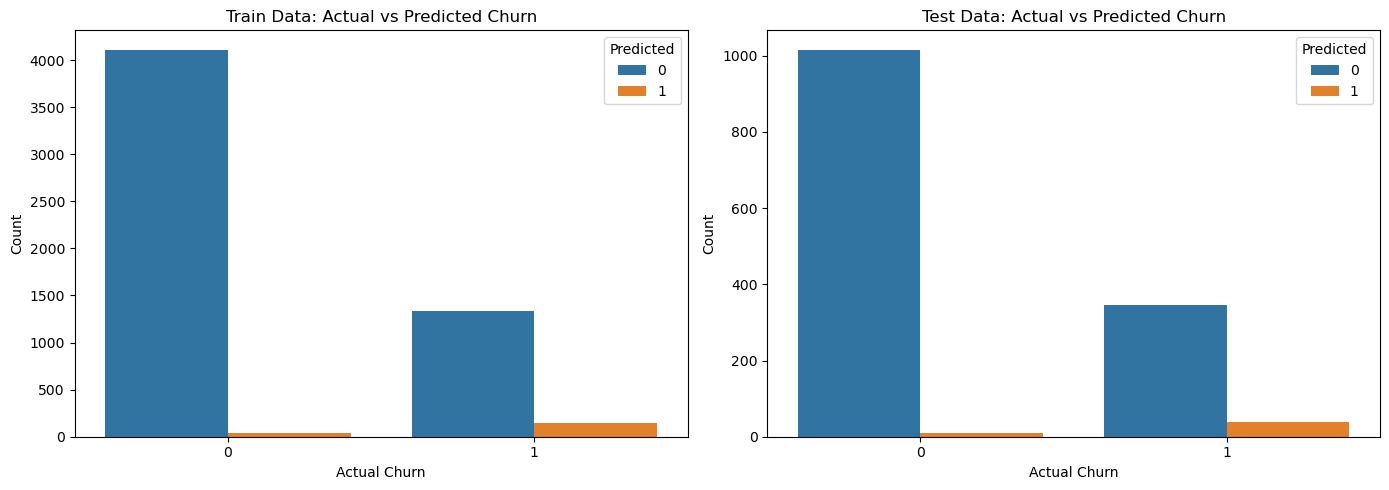

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
sns.countplot(x='Churn', hue=y_rf_train_pred, data=y_train.assign(Pred=y_rf_train_pred), ax=axes[0])
axes[0].set_title('Train Data: Actual vs Predicted Churn')
axes[0].set_xlabel('Actual Churn')
axes[0].set_ylabel('Count')
axes[0].legend(title='Predicted')

# Test set
sns.countplot(x='Churn', hue=y_rf_test_pred, data=y_test.assign(Pred=y_rf_test_pred), ax=axes[1])
axes[1].set_title('Test Data: Actual vs Predicted Churn')
axes[1].set_xlabel('Actual Churn')
axes[1].set_ylabel('Count')
axes[1].legend(title='Predicted')

plt.tight_layout()
plt.show()

#### using grid search cv on randomforest

In [86]:
import warnings
warnings.filterwarnings("ignore")
param_grid = {
    'n_estimators': [100],          # Reduced from [50, 100, 200]
    'max_depth': [10, 20],          # Reduced from [None, 10, 20, 30]
    'min_samples_split': [5, 10],   # Focus on higher values to prevent overfitting
    'max_features': ['sqrt']        # Removed 'log2' option
}

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                           # Reduced from 5 folds
    scoring='accuracy',
    n_jobs=1,                       # Use 1 core to avoid memory issues
    # verbose=2
)

rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_
best_params = rf_grid_search.best_params_

print("Best Parameters:", best_params)
print("-----------------------")

y_test_grid_pred_rf = best_rf.predict(X_test)
y_train_grid_pred_rf = best_rf.predict(X_train)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_grid_pred_rf))
print("Test Recall:", recall_score(y_test, y_test_grid_pred_rf))
print("Test Precision:", precision_score(y_test, y_test_grid_pred_rf))
print("Test F1 Score:", f1_score(y_test, y_test_grid_pred_rf))
print("-----------------------")
print("Train Accuracy:", accuracy_score(y_train, y_train_grid_pred_rf))
print("Train Recall:", recall_score(y_train, y_train_grid_pred_rf))
print("Train Precision:", precision_score(y_train, y_train_grid_pred_rf))
print("Train F1 Score:", f1_score(y_train, y_train_grid_pred_rf))

rf_grid_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_train_grid_pred_rf),
        recall_score(y_train, y_train_grid_pred_rf),
        precision_score(y_train, y_train_grid_pred_rf),
        f1_score(y_train, y_train_grid_pred_rf)
    ],
    'Test': [
        accuracy_score(y_test, y_test_grid_pred_rf),
        recall_score(y_test, y_test_grid_pred_rf),
        precision_score(y_test, y_test_grid_pred_rf),
        f1_score(y_test, y_test_grid_pred_rf)
    ]
})
print("------------------------")
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_grid_pred_rf))
print('------------------')
# Classification Report
print(classification_report(y_test, y_test_grid_pred_rf))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
-----------------------
Test Accuracy: 0.7927608232789212
Test Recall: 0.5703125
Test Precision: 0.6329479768786127
Test F1 Score: 0.6
-----------------------
Train Accuracy: 0.872381966631168
Train Recall: 0.7144781144781145
Train Precision: 0.782448377581121
Train F1 Score: 0.7469200985568462
------------------------
Confusion Matrix:
 [[898 127]
 [165 219]]
------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1025
           1       0.63      0.57      0.60       384

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [73]:
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))

                           Feature  Importance
8                     TotalCharges    0.148271
4                           tenure    0.147590
9          Contract_Month-to-month    0.112991
7                   MonthlyCharges    0.095394
32                  TechSupport_No    0.055249
21     InternetService_Fiber optic    0.047453
23               OnlineSecurity_No    0.043086
14  PaymentMethod_Electronic check    0.035480
11               Contract_Two year    0.026541
26                 OnlineBackup_No    0.025883


In [87]:
rf_report_df

,Metric,Train,Test
0,Accuracy,0.804934,0.789212
1,Recall,0.542761,0.528646
2,Precision,0.657423,0.636364
3,F1 Score,0.594615,0.577525


In [88]:
rf_grid_report_df

,Metric,Train,Test
0,Accuracy,0.872382,0.792761
1,Recall,0.714478,0.570312
2,Precision,0.782448,0.632948
3,F1 Score,0.746920,0.600000


### 3) XGBoost

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier
# Train XGBoost model
xgb = XGBClassifier( eval_metric='logloss',random_state=42)
xgb.fit(X_train, y_train.values.ravel())

# Predictions
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)

# Accuracy

train_acc_xgb = accuracy_score(y_train, y_xgb_train_pred)
train_recall_xgb = recall_score(y_train, y_xgb_train_pred)
train_precision_xgb = precision_score(y_train, y_xgb_train_pred)
train_f1_xgb = f1_score(y_train, y_xgb_train_pred)

test_acc_xgb = accuracy_score(y_test, y_xgb_test_pred)
test_recall_xgb = recall_score(y_test, y_xgb_test_pred)
test_precision_xgb = precision_score(y_test, y_xgb_test_pred)
test_f1_xgb = f1_score(y_test, y_xgb_test_pred)

print(f"Train Accuracy: {train_acc_xgb:.3f}")
print(f"Train Recall: {train_recall_xgb:.3f}")
print(f"Train Precision: {train_precision_xgb:.3f}")
print(f"Train F1 Score: {train_f1_xgb:.3f}")
print("-----------------------")
print(f"Test Accuracy: {test_acc_xgb:.3f}")
print(f"Test Recall: {test_recall_xgb:.3f}")
print(f"Test Precision: {test_precision_xgb:.3f}")
print(f"Test F1 Score: {test_f1_xgb:.3f}")

xgb_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [train_acc_xgb, train_recall_xgb, train_precision_xgb, train_f1_xgb],
    'Test': [test_acc_xgb, test_recall_xgb, test_precision_xgb, test_f1_xgb]
})

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_xgb_test_pred)
print("Confusion Matrix:\n", cm_xgb)

# Classification Report
xgb_report = classification_report(y_test, y_xgb_test_pred, output_dict=True)
print(xgb_report)

# AUC-ROC
y_xgb_proba = xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_xgb_proba)
print(f"AUC-ROC: {auc_xgb:.3f}")


Train Accuracy: 0.945
Train Recall: 0.871
Train Precision: 0.916
Train F1 Score: 0.893
-----------------------
Test Accuracy: 0.792
Test Recall: 0.586
Test Precision: 0.627
Test F1 Score: 0.606
Confusion Matrix:
 [[891 134]
 [159 225]]
{'0': {'precision': 0.8485714285714285, 'recall': 0.8692682926829268, 'f1-score': 0.8587951807228915, 'support': 1025.0}, '1': {'precision': 0.6267409470752089, 'recall': 0.5859375, 'f1-score': 0.6056527590847914, 'support': 384.0}, 'accuracy': 0.7920511000709723, 'macro avg': {'precision': 0.7376561878233188, 'recall': 0.7276028963414634, 'f1-score': 0.7322239699038415, 'support': 1409.0}, 'weighted avg': {'precision': 0.7881151440472637, 'recall': 0.7920511000709723, 'f1-score': 0.7898053369265604, 'support': 1409.0}}
AUC-ROC: 0.858


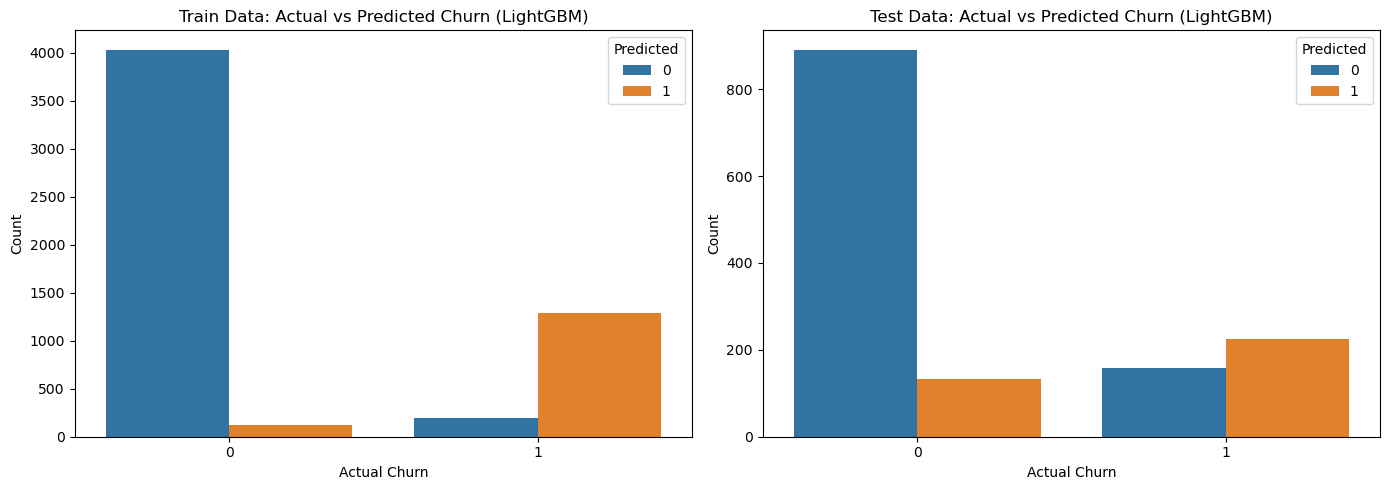

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set: Actual vs Predicted
sns.countplot(x='Churn', hue=y_xgb_train_pred, data=y_train.assign(Pred=y_xgb_train_pred), ax=axes[0])
axes[0].set_title('Train Data: Actual vs Predicted Churn (LightGBM)')
axes[0].set_xlabel('Actual Churn')
axes[0].set_ylabel('Count')
axes[0].legend(title='Predicted')

# Test set: Actual vs Predicted
sns.countplot(x='Churn', hue=y_xgb_test_pred, data=y_test.assign(Pred=y_xgb_test_pred), ax=axes[1])
axes[1].set_title('Test Data: Actual vs Predicted Churn (LightGBM)')
axes[1].set_xlabel('Actual Churn')
axes[1].set_ylabel('Count')
axes[1].legend(title='Predicted')

plt.tight_layout()
plt.show()

### GridSearch on XGBoost

In [103]:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [100],          # Reduced for speed
    'max_depth': [3, 6],            # Typical range for XGBoost (shallow trees)
    'learning_rate': [0.01, 0.1],   # Lower rates often better but slower
    'subsample': [0.8, 1.0],        # Controls ovexgbitting via row sampling
    'colsample_bytree': [0.8, 1.0], # Controls ovexgbitting via column sampling
}
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                           # Reduced from 5 folds
    scoring='accuracy',
    n_jobs=1,                       # Use 1 core to avoid memory issues
    # verbose=2
)

xgb_grid_search.fit(X_train, y_train)

best_xgb = xgb_grid_search.best_estimator_
best_params = xgb_grid_search.best_params_

print("Best Parameters:", best_params)
print("-----------------------")

y_test_grid_pred_xgb = best_xgb.predict(X_test)
y_train_grid_pred_xgb = best_xgb.predict(X_train)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_grid_pred_xgb))
print("Test Recall:", recall_score(y_test, y_test_grid_pred_xgb))
print("Test Precision:", precision_score(y_test, y_test_grid_pred_xgb))
print("Test F1 Score:", f1_score(y_test, y_test_grid_pred_xgb))
print("-----------------------")
print("Train Accuracy:", accuracy_score(y_train, y_train_grid_pred_xgb))
print("Train Recall:", recall_score(y_train, y_train_grid_pred_xgb))
print("Train Precision:", precision_score(y_train, y_train_grid_pred_xgb))
print("Train F1 Score:", f1_score(y_train, y_train_grid_pred_xgb))

xgb_grid_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_train_grid_pred_xgb),
        recall_score(y_train, y_train_grid_pred_xgb),
        precision_score(y_train, y_train_grid_pred_xgb),
        f1_score(y_train, y_train_grid_pred_xgb)
    ],
    'Test': [
        accuracy_score(y_test, y_test_grid_pred_xgb),
        recall_score(y_test, y_test_grid_pred_xgb),
        precision_score(y_test, y_test_grid_pred_xgb),
        f1_score(y_test, y_test_grid_pred_xgb)
    ]
})
print("------------------------")
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_grid_pred_xgb))
print('------------------')
# Classification Report
print(classification_report(y_test, y_test_grid_pred_xgb))

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
-----------------------
Test Accuracy: 0.8069552874378992
Test Recall: 0.6171875
Test Precision: 0.6546961325966851
Test F1 Score: 0.6353887399463807
-----------------------
Train Accuracy: 0.8370607028753994
Train Recall: 0.6363636363636364
Train Precision: 0.7142857142857143
Train F1 Score: 0.6730769230769231
------------------------
Confusion Matrix:
 [[900 125]
 [147 237]]
------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1025
           1       0.65      0.62      0.64       384

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.80      0.81      0.81      1409



In [98]:
xgb_report_df

,Metric,Train,Test
0,Accuracy,0.944799,0.792051
1,Recall,0.870707,0.585938
2,Precision,0.915722,0.626741
3,F1 Score,0.892648,0.605653


In [105]:
xgb_grid_report_df

,Metric,Train,Test
0,Accuracy,0.837061,0.806955
1,Recall,0.636364,0.617188
2,Precision,0.714286,0.654696
3,F1 Score,0.673077,0.635389


### 4) LightGBM

In [101]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Train LightGBM model
lgbm = lgb.LGBMClassifier(random_state=100)
lgbm.fit(X_train, y_train.values.ravel())

# Predictions
y_lgb_train_pred = lgbm.predict(X_train)
y_lgb_test_pred = lgbm.predict(X_test)

#Accuracy
train_acc_lgb = accuracy_score(y_train, y_lgb_train_pred)
train_recall_lgb = recall_score(y_train, y_lgb_train_pred)
train_precision_lgb = precision_score(y_train, y_lgb_train_pred)
train_f1_lgb = f1_score(y_train, y_lgb_train_pred)
# Accuracy on TEST data
test_acc_lgb = accuracy_score(y_test, y_lgb_test_pred)
test_recall_lgb = recall_score(y_test, y_lgb_test_pred)
test_precision_lgb = precision_score(y_test, y_lgb_test_pred)
test_f1_lgb = f1_score(y_test, y_lgb_test_pred)

print(f"Train Accuracy: {train_acc_lgb:.3f}")
print(f"Train Recall: {train_recall_lgb:.3f}")
print(f"Train Precision: {train_precision_lgb:.3f}")
print(f"Train F1 Score: {train_f1_lgb:.3f}")
print("-----------------------")
print(f"Test Accuracy: {test_acc_lgb:.3f}")
print(f"Test Recall: {test_recall_lgb:.3f}")
print(f"Test Precision: {test_precision_lgb:.3f}")
print(f"Test F1 Score: {test_f1_lgb:.3f}")

lgb_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [train_acc_lgb, train_recall_lgb, train_precision_lgb, train_f1_lgb],
    'Test': [test_acc_lgb, test_recall_lgb, test_precision_lgb, test_f1_lgb]
})
# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_lgb_test_pred)
print("Confusion Matrix:\n", cm_lgb)

# Classification Report
lgb_report = classification_report(y_test, y_lgb_test_pred, output_dict=True)
print(lgb_report_df)

# AUC-ROC
y_lgb_proba = lgbm.predict_proba(X_test)[:, 1]
auc_lgb = roc_auc_score(y_test, y_lgb_proba)
print(f"AUC-ROC: {auc_lgb:.3f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1485, number of negative: 4149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263578 -> initscore=-1.027453
[LightGBM] [Info] Start training from score -1.027453
Train Accuracy: 0.895
Train Recall: 0.764
Train Precision: 0.824
Train F1 Score: 0.793
-----------------------
Test Accuracy: 0.803
Test Recall: 0.617
Test Precision: 0.644
Test F1 Score: 0.630
Confusion Matrix:
 [[894 131]
 [147 237]]
      Metric     Train      Test
0   Accuracy  0.894924  0.802697
1     Recall  0.764310  0.617188
2  Precision  0.824256  0.64402

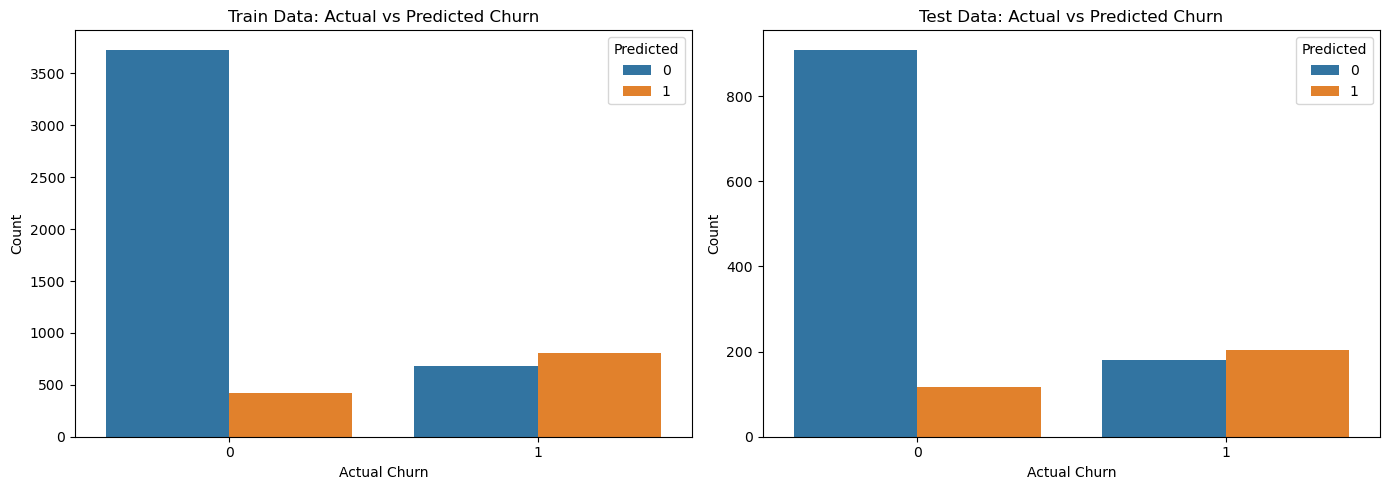

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set: Actual vs Predicted
sns.countplot(x='Churn', hue=lr_y_train_pred, data=y_train.assign(Pred=lr_y_train_pred), ax=axes[0])
axes[0].set_title('Train Data: Actual vs Predicted Churn')
axes[0].set_xlabel('Actual Churn')
axes[0].set_ylabel('Count')
axes[0].legend(title='Predicted')

# Test set: Actual vs Predicted
sns.countplot(x='Churn', hue=lr_y_test_pred, data=y_test.assign(Pred=lr_y_test_pred), ax=axes[1])
axes[1].set_title('Test Data: Actual vs Predicted Churn')
axes[1].set_xlabel('Actual Churn')
axes[1].set_ylabel('Count')
axes[1].legend(title='Predicted')

plt.tight_layout()
plt.show()

#### GridSearch for LightGBM

In [107]:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [100],          # Reduced for speed
    'max_depth': [3, 6],            # Shallower trees work well with LightGBM
    'learning_rate': [0.01, 0.1],   # Lower rates often better but slower
    'subsample': [0.8, 1.0],        # Controls overfitting via row sampling
    'colsample_bytree': [0.8, 1.0], # Controls overfitting via column sampling
    'num_leaves': [31, 63],         # Key parameter for LightGBM (controls complexity)
}

lgbm_grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,                           # Reduced from 5 folds
    scoring='accuracy',
    n_jobs=1,                       # Use 1 core to avoid memory issues
    # verbose=2
)

lgbm_grid_search.fit(X_train, y_train)

best_lgbm = lgbm_grid_search.best_estimator_
best_params = lgbm_grid_search.best_params_

print("Best Parameters:", best_params)
print("-----------------------")

y_test_grid_pred_lgbm = best_lgbm.predict(X_test)
y_train_grid_pred_lgbm = best_lgbm.predict(X_train)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_grid_pred_lgbm))
print("Test Recall:", recall_score(y_test, y_test_grid_pred_lgbm))
print("Test Precision:", precision_score(y_test, y_test_grid_pred_lgbm))
print("Test F1 Score:", f1_score(y_test, y_test_grid_pred_lgbm))
print("-----------------------")
print("Train Accuracy:", accuracy_score(y_train, y_train_grid_pred_lgbm))
print("Train Recall:", recall_score(y_train, y_train_grid_pred_lgbm))
print("Train Precision:", precision_score(y_train, y_train_grid_pred_lgbm))
print("Train F1 Score:", f1_score(y_train, y_train_grid_pred_lgbm))

lgbm_grid_report_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_train_grid_pred_lgbm),
        recall_score(y_train, y_train_grid_pred_lgbm),
        precision_score(y_train, y_train_grid_pred_lgbm),
        f1_score(y_train, y_train_grid_pred_lgbm)
    ],
    'Test': [
        accuracy_score(y_test, y_test_grid_pred_lgbm),
        recall_score(y_test, y_test_grid_pred_lgbm),
        precision_score(y_test, y_test_grid_pred_lgbm),
        f1_score(y_test, y_test_grid_pred_lgbm)
    ]
})
print("------------------------")
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_grid_pred_lgbm))
print('------------------')
# Classification Report
print(classification_report(y_test, y_test_grid_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 990, number of negative: 2766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263578 -> initscore=-1.027453
[LightGBM] [Info] Start training from score -1.027453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [108]:
lgb_report_df

,Metric,Train,Test
0,Accuracy,0.894924,0.802697
1,Recall,0.764310,0.617188
2,Precision,0.824256,0.644022
3,F1 Score,0.793152,0.630319


In [109]:
lgbm_grid_report_df

,Metric,Train,Test
0,Accuracy,0.839013,0.806955
1,Recall,0.635690,0.609375
2,Precision,0.720611,0.657303
3,F1 Score,0.675492,0.632432


### Comparision of all models 

In [114]:
metrics_df = pd.concat([lr_report_df, lr_grid_report_df, rf_report_df, rf_grid_report_df, xgb_report_df, xgb_grid_report_df, lgb_report_df, lgbm_grid_report_df], axis=0)
metrics_df.reset_index(drop=True, inplace=True)
metrics_df['Model'] = ['Logistic Regression', 'Logistic Regression (Grid Search)', 'Random Forest', 'Random Forest (Grid Search)', 'XGBoost', 'XGBoost (Grid Search)', 'LightGBM', 'LightGBM (Grid Search)']
metrics_df = metrics_df[['Model', 'Metric', 'Train', 'Test']]
metrics_df

ValueError: Length of values (8) does not match length of index (32)

In [115]:
# Define the DataFrames and their corresponding names
dataframes = [
    lr_report_df, lr_grid_report_df, rf_report_df, rf_grid_report_df,
    xgb_report_df, xgb_grid_report_df, lgb_report_df, lgbm_grid_report_df
]
model_names = [
    'Logistic Regression', 'Logistic Regression (Grid Search)',
    'Random Forest', 'Random Forest (Grid Search)',
    'XGBoost', 'XGBoost (Grid Search)',
    'LightGBM', 'LightGBM (Grid Search)'
]

# Add the 'Model' column to each DataFrame using a list comprehension
modified_dfs = [df.assign(Model=name) for df, name in zip(dataframes, model_names)]

# Concatenate all the modified DataFrames
# ignore_index=True creates a new clean index from 0 to N-1
metrics_df = pd.concat(modified_dfs, axis=0, ignore_index=True)

# Reorder columns for final presentation
metrics_df = metrics_df[['Model', 'Metric', 'Train', 'Test']]
metrics_df



,Model,Metric,Train,Test
0,Logistic Regression,Accuracy,0.804934,0.789212
1,Logistic Regression,Recall,0.542761,0.528646
2,Logistic Regression,Precision,0.657423,0.636364
3,Logistic Regression,F1 Score,0.594615,0.577525
4,Logistic Regression (Grid Search),Accuracy,0.807952,0.784244
5,Logistic Regression (Grid Search),Recall,0.520539,0.481771
6,Logistic Regression (Grid Search),Precision,0.676290,0.637931
7,Logistic Regression (Grid Search),F1 Score,0.588280,0.548961
8,Random Forest,Accuracy,0.804934,0.789212
9,Random Forest,Recall,0.542761,0.528646


In [123]:
#metrics based on accuracy of each model only
accuracy_df = metrics_df[metrics_df['Metric'] == 'Accuracy'].reset_index(drop=True)
accuracy_df = accuracy_df[['Model', 'Train', 'Test']]
#sort the DataFrame by Test accuracy in descending order
accuracy_df.sort_values(by='Test', ascending=False, inplace=True)
accuracy_df

,Model,Train,Test
5,XGBoost (Grid Search),0.837061,0.806955
7,LightGBM (Grid Search),0.839013,0.806955
6,LightGBM,0.894924,0.802697
3,Random Forest (Grid Search),0.872382,0.792761
4,XGBoost,0.944799,0.792051
0,Logistic Regression,0.804934,0.789212
2,Random Forest,0.804934,0.789212
1,Logistic Regression (Grid Search),0.807952,0.784244


In [ ]:
import numpy as np

# Prepare input sample as a DataFrame with correct columns
input_sample = np.array([[1, 0, 0, 0, 1.369912, 1, 1, 1.358961, 2.047611, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]]) 
# Predict #0(No)
lr_prediction = lr.predict(input_sample)  
print(f"Predicted Churn by LR:")
if lr_prediction==1:
    print("Yes")
else:
    print("No")

# Prepare input sample2 as a DataFrame with correct columns
input_sample2 = np.array([[1, 0, 0, 0, 66.0, 1, 1, 105.65, 6844.0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]])

# Predict using Random Forest
rf_prediction = rf.predict(input_sample2)  
print(f"Predicted Churn by RF:")
if rf_prediction==1:
    print("Yes")
else:
    print("No")

# Predict using XGBoost
xgb_prediction = xgb.predict(input_sample2)  
print(f"Predicted Churn by XGB:")
if xgb_prediction==1:
    print("Yes")
else:
    print("No")

# Predict using LGB
lgb_prediction = lgbm.predict(input_sample2)  
print(f"Predicted Churn by LGB:")
if lgb_prediction==1:
    print("Yes")
else:
    print("No")    